In [247]:
# Dependencies
import pandas as pd
import numpy as np
import os
import datetime as dt

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
matplotlib.use('nbagg')

/Users/shikhapurohit/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/shikhapurohit/anaconda3/envs/PythonData/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/shikhapurohit/anaconda3/envs/PythonData/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/shikhapurohit/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/shikhapurohit/anaconda3/envs/PythonData/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance


In [248]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [249]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [250]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [251]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [252]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [253]:
# Assign the measurements class to a variable called `Measurements`
Measurements = Base.classes.measurements

In [254]:
# Assign the stations class to a variable called `Stations`
Stations = Base.classes.stations

In [255]:
# Create a session
session = Session(engine)

In [256]:
# Display the Measurements row's columns and data in dictionary format
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1132cd7f0>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [257]:
# Display the Stations row's columns and data in dictionary format
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1132c0f98>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [258]:
#--------------------------------
### Start and End date of my trip
#--------------------------------
start_date = "2014-08-15" #8/15/14
end_date = "2014/08/28" #8/28/14

In [259]:
#---------------------------
#### Precipitation Analysis
#---------------------------
startDate = dt.date(2014, 8 ,15)
# date 1 year ago from start_date
year_ago = startDate - dt.timedelta(days=365)
print("Date year ago: ", year_ago)

Date year ago:  2013-08-15


In [260]:
# Design a query to retrieve the last 12 months of precipitation data. 
# Select only the `date` and `prcp` values.

sel = [Measurements.date, Measurements.prcp]

prcp_data = session.query(*sel).\
    filter(Measurements.date < startDate).\
    filter(Measurements.date > year_ago).\
    filter(Measurements.station == "USC00511918").all()
    
prcp_data

[('2013-08-16', 0.01),
 ('2013-08-17', 0.0),
 ('2013-08-18', 0.0),
 ('2013-08-19', 0.0),
 ('2013-08-20', 0.0),
 ('2013-08-21', 0.0),
 ('2013-08-22', 0.0),
 ('2013-08-23', 0.0),
 ('2013-08-24', 0.0),
 ('2013-08-25', 0.0),
 ('2013-08-26', 0.0),
 ('2013-08-27', 0.0),
 ('2013-08-28', 0.0),
 ('2013-08-29', 0.06),
 ('2013-08-30', 0.0),
 ('2013-08-31', 0.0),
 ('2013-09-01', 0.35),
 ('2013-09-02', 0.0),
 ('2013-09-03', 0.0),
 ('2013-09-04', 0.0),
 ('2013-09-05', 0.0),
 ('2013-09-06', 0.0),
 ('2013-09-07', 0.05),
 ('2013-09-08', 0.01),
 ('2013-09-09', 0.0),
 ('2013-09-10', 0.0),
 ('2013-09-11', 0.0),
 ('2013-09-12', 0.0),
 ('2013-09-13', 0.22),
 ('2013-09-14', 0.14),
 ('2013-09-15', 0.16),
 ('2013-09-16', 0.0),
 ('2013-09-17', 0.0),
 ('2013-09-18', 0.0),
 ('2013-09-19', 0.0),
 ('2013-09-20', 0.0),
 ('2013-09-21', 0.0),
 ('2013-09-22', 0.0),
 ('2013-09-23', 0.0),
 ('2013-09-24', 0.0),
 ('2013-09-25', 0.1),
 ('2013-09-26', 0.01),
 ('2013-09-27', 0.04),
 ('2013-09-28', 0.0),
 ('2013-09-29', 0.1),


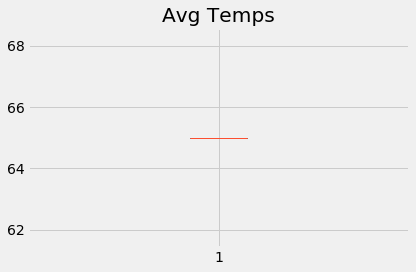

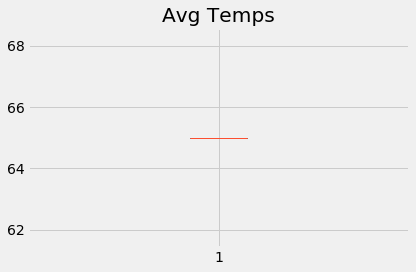

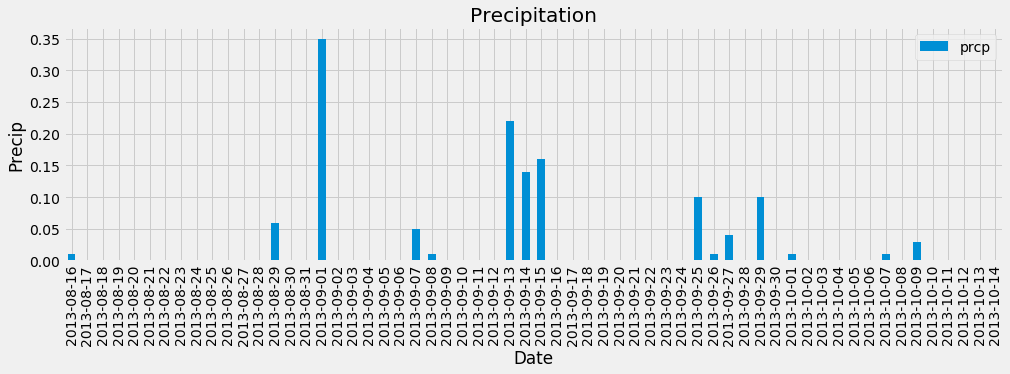

In [261]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
# df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
# df.set_index('date', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()
new_df = pd.DataFrame(prcp_data, columns=['date', 'prcp']).head(60)
new_df.plot.bar(x='date', y='prcp', 
                                align='center', figsize=(15, 4))


plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precip")
plt.show()
### END SOLUTION

In [262]:
# Use Pandas to print the summary statistics for the precipitation data.


In [263]:
#--------------------
### Station Analysis
#--------------------
from sqlalchemy import func, desc

# Design a query to calculate the total number of stations.
num_stations = session.query(Stations).group_by(Stations.station).count()
num_stations

9

In [264]:
# Design a query to find the most active stations.
staions_count = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).all()
staions_count

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [265]:
# List the stations and observation counts in descending order
#staions_count_desc = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).\
staions_count_desc = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
staions_count_desc

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [266]:
# Most active station: Which station has the highest number of observations.
most_active = session.query(Measurements.station, Stations.name, func.count(Measurements.station)).\
filter(Measurements.station == Stations.station).group_by(Measurements.station)\
.order_by(func.count(Measurements.station).desc()).first()
most_active

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [267]:
# # Which station has the highest number of observations?
# #sel = [Measurements.station, Stations.name]
# most_active_name = session.query(Measurements.station,Stations.name, func.count(Measurements.station)).\
# filter(Measurements.station == Stations.station).group_by(Measurements.station)\
# .order_by(func.count(Measurements.station).desc()).first()

# most_active_name

In [268]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
sel = [Measurements.date, Measurements.tobs,Stations.name ]

tobs_data = session.query(*sel).\
    filter(Measurements.station == Stations.station).filter(Measurements.date < startDate).\
    filter(Measurements.date > year_ago).all()
    
tobs_data


[('2013-08-16', 76, 'WAIKIKI 717.2, HI US'),
 ('2013-08-17', 78, 'WAIKIKI 717.2, HI US'),
 ('2013-08-18', 78, 'WAIKIKI 717.2, HI US'),
 ('2013-08-19', 77, 'WAIKIKI 717.2, HI US'),
 ('2013-08-20', 74, 'WAIKIKI 717.2, HI US'),
 ('2013-08-21', 77, 'WAIKIKI 717.2, HI US'),
 ('2013-08-22', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-08-23', 77, 'WAIKIKI 717.2, HI US'),
 ('2013-08-24', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-08-25', 80, 'WAIKIKI 717.2, HI US'),
 ('2013-08-26', 80, 'WAIKIKI 717.2, HI US'),
 ('2013-08-27', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-08-28', 76, 'WAIKIKI 717.2, HI US'),
 ('2013-08-29', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-08-30', 78, 'WAIKIKI 717.2, HI US'),
 ('2013-08-31', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-09-01', 78, 'WAIKIKI 717.2, HI US'),
 ('2013-09-02', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-09-03', 79, 'WAIKIKI 717.2, HI US'),
 ('2013-09-04', 77, 'WAIKIKI 717.2, HI US'),
 ('2013-09-05', 74, 'WAIKIKI 717.2, HI US'),
 ('2013-09-06', 74, 'WAIKIKI 717.2, HI US'),
 ('2013-09

In [269]:
# Filter by the station with the highest number of tobs observations.

highest_num_tobs = session.query(Measurements.station, Stations.name, Measurements.tobs, func.count(Measurements.station)).\
filter(Measurements.station == Stations.station).group_by(Measurements.station)\
.order_by(func.count(Measurements.station).desc()).first()
highest_num_tobs

('USC00519281', 'WAIHEE 837.5, HI US', 79, 2772)

In [270]:
# Filter by the station with the highest number of tobs observations; show all the rows for that station:
highest_num_tobs = session.query(Measurements.station, Stations.name, Measurements.tobs, func.count(Measurements.station)).\
filter(Measurements.station == Stations.station).group_by(Measurements.station)\
.order_by(func.count(Measurements.station).desc()).all()
#highest_num_tobs[0].station
highest_num_tobs

[('USC00519281', 'WAIHEE 837.5, HI US', 79, 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 77, 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 81, 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 82, 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 76, 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 82, 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 64, 1932),
 ('USC00517948', 'PEARL CITY, HI US', 80, 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 74, 342)]

In [271]:
sel = [Measurements.tobs]

tobs_highest_data_station = session.query(*sel).\
    filter(Measurements.station == Stations.station).filter(Measurements.date < startDate).\
    filter(Measurements.date > year_ago).filter(Measurements.station == highest_num_tobs[0].station).all()
tobs_highest_data_station

[(71),
 (75),
 (76),
 (70),
 (71),
 (71),
 (72),
 (74),
 (77),
 (77),
 (75),
 (75),
 (70),
 (70),
 (71),
 (78),
 (75),
 (78),
 (72),
 (69),
 (67),
 (68),
 (74),
 (74),
 (81),
 (73),
 (73),
 (70),
 (73),
 (72),
 (75),
 (77),
 (75),
 (71),
 (74),
 (74),
 (77),
 (76),
 (72),
 (74),
 (71),
 (72),
 (72),
 (79),
 (75),
 (67),
 (74),
 (73),
 (78),
 (76),
 (74),
 (71),
 (73),
 (71),
 (75),
 (72),
 (71),
 (70),
 (70),
 (70),
 (70),
 (71),
 (71),
 (67),
 (65),
 (68),
 (66),
 (66),
 (69),
 (71),
 (69),
 (70),
 (81),
 (70),
 (75),
 (68),
 (76),
 (76),
 (76),
 (78),
 (69),
 (70),
 (70),
 (67),
 (70),
 (74),
 (71),
 (72),
 (67),
 (61),
 (68),
 (70),
 (71),
 (76),
 (68),
 (64),
 (67),
 (68),
 (65),
 (70),
 (66),
 (71),
 (72),
 (67),
 (74),
 (69),
 (76),
 (72),
 (73),
 (70),
 (66),
 (64),
 (65),
 (73),
 (74),
 (67),
 (73),
 (70),
 (67),
 (71),
 (78),
 (69),
 (63),
 (64),
 (66),
 (69),
 (69),
 (71),
 (72),
 (69),
 (70),
 (73),
 (68),
 (69),
 (73),
 (73),
 (70),
 (65),
 (72),
 (74),
 (66),
 (68),
 (62),

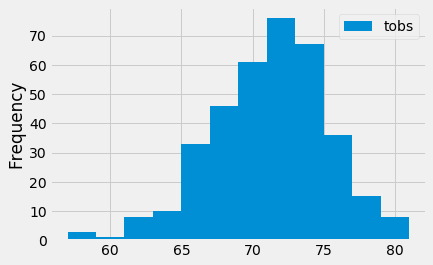

In [272]:
# Plot the Results in a Matplotlib histogram chart
### BEGIN SOLUTION
df = pd.DataFrame(tobs_highest_data_station)
df.plot.hist(bins=12)
plt.show()

In [273]:
#----------------------
###Temperature Analysis
#----------------------

#Write a function called `calc_temps` that will accept a start date and end date 
#in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    returnVal = []
    min_temp = session.query(func.min(Measurements.tobs)).filter(func.strftime(Measurements.date >= start_date)).\
                            filter(func.strftime(Measurements.date < end_date))
    returnVal.append(min_temp.first())
    avg_temp = session.query(func.avg(Measurements.tobs)).filter(func.strftime(Measurements.date >= start_date)).\
                            filter(func.strftime(Measurements.date < end_date))
    returnVal.append(avg_temp.first())
    max_temp = session.query(func.max(Measurements.tobs)).filter(func.strftime(Measurements.date > start_date)).\
                            filter(func.strftime(Measurements.date < end_date))
    returnVal.append(max_temp.first())
    
    return returnVal #min_temp.first(), avg_temp.first(), max_temp.first()

# Use the `calc_temps` function to calculate the min, avg, and max temperatures
# for your trip using the matching dates from the previous year
result = calc_temps("2015-01-01", "2015-01-10")
print(str(result[0]) + str(result[1]) + str(result[2]))


(56,)(65.27272727272727,)(75,)


In [280]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
# result

# df = pd.DataFrame.from_records(result)
# df
# df.iat[2,0]
# # df.plot.bar(x = df.iat[1,0], y = (df.iat[2,0] - df.iat[0,0]))
# df.plot(kind='bar', title ="Avg Temp", figsize=(5,7), legend=True, fontsize=12)
# # df.plot.xlabel("Avg")
# # df.plot.ylabel("Temp(F)")
# plt.show()

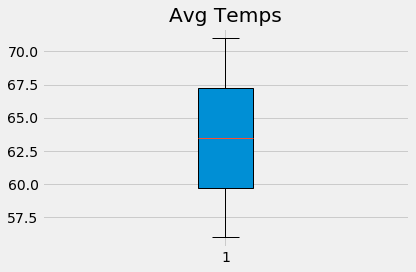

In [281]:
import numpy as np

reslt = list(np.ravel(result))
diff = int(reslt[2])-int(reslt[0])
fig, ax = plt.subplots()

x = range(int(reslt[1]))
ax.boxplot(range(int(reslt[0]), int(reslt[2]), 5) , patch_artist=True)
ax.set_title('Avg Temps')
fig.tight_layout()
plt.show()